In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("listings.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1.489424e+06,"Welcoming, easygoing, comfy bed, entire level",5294164,Efrat,NaN,FOURTEENTH WARD,42.667190,-73.815800,Private room,50.0,1,242,2/10/2024,1.91,1,0,48,NaN
1,2.992450e+06,Luxury 2 bedroom apartment,4621559,Kenneth,NaN,THIRD WARD,42.657890,-73.753700,Entire home/apt,70.0,28,9,8/17/2022,0.08,1,349,0,NaN
2,3.820211e+06,Restored Precinct in Center Sq. w/Parking,19648678,Terra,NaN,SIXTH WARD,42.652220,-73.767240,Entire home/apt,125.0,2,291,11/19/2023,2.52,4,357,8,NaN
3,5.651579e+06,Large studio apt by Capital Center & ESP@,29288920,Gregg,NaN,SECOND WARD,42.646150,-73.759660,Entire home/apt,68.0,2,333,2/1/2024,3.12,2,148,28,NaN
4,6.623339e+06,Center Sq. Loft in Converted Precinct w/ Parking,19648678,Terra,NaN,SIXTH WARD,42.652220,-73.767240,Entire home/apt,140.0,1,306,12/26/2023,2.89,4,0,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.072780e+18,The Bluebird’s Nest,426223840,Antonio,NaN,ELEVENTH WARD,42.663916,-73.777869,Entire home/apt,117.0,1,0,NaN,NaN,2,0,0,NaN
403,1.073180e+18,In the heart of Albany,31994990,G.G.,NaN,SEVENTH WARD,42.644729,-73.776412,Entire home/apt,53.0,30,0,NaN,NaN,2,271,0,NaN
404,1.074650e+18,Room available,480004905,Ramiz,NaN,ELEVENTH WARD,42.662827,-73.774371,Private room,60.0,1,0,NaN,NaN,2,269,0,NaN
405,1.075440e+18,The Tangerine Door,542733174,Rebecca,NaN,TWELFTH WARD,42.679082,-73.795049,Entire home/apt,110.0,2,1,2/4/2024,1.00,1,241,1,NaN


## Data cleaning: handling missing values/outliers:

In [3]:
#returns number of null values in each column
df.isna().sum()
#found missing values in price, neighborhood group, last review and reviews per month

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood_group               407
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                              43
minimum_nights                      0
number_of_reviews                   0
last_review                        47
reviews_per_month                  47
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
license                           407
dtype: int64

In [4]:
#delete "neighbourhood_group" column and "license" since they both have no values
table=df.drop("neighbourhood_group",axis=1)
table=table.drop("license",axis=1)
table

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,1.489424e+06,"Welcoming, easygoing, comfy bed, entire level",5294164,Efrat,FOURTEENTH WARD,42.667190,-73.815800,Private room,50.0,1,242,2/10/2024,1.91,1,0,48
1,2.992450e+06,Luxury 2 bedroom apartment,4621559,Kenneth,THIRD WARD,42.657890,-73.753700,Entire home/apt,70.0,28,9,8/17/2022,0.08,1,349,0
2,3.820211e+06,Restored Precinct in Center Sq. w/Parking,19648678,Terra,SIXTH WARD,42.652220,-73.767240,Entire home/apt,125.0,2,291,11/19/2023,2.52,4,357,8
3,5.651579e+06,Large studio apt by Capital Center & ESP@,29288920,Gregg,SECOND WARD,42.646150,-73.759660,Entire home/apt,68.0,2,333,2/1/2024,3.12,2,148,28
4,6.623339e+06,Center Sq. Loft in Converted Precinct w/ Parking,19648678,Terra,SIXTH WARD,42.652220,-73.767240,Entire home/apt,140.0,1,306,12/26/2023,2.89,4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.072780e+18,The Bluebird’s Nest,426223840,Antonio,ELEVENTH WARD,42.663916,-73.777869,Entire home/apt,117.0,1,0,NaN,NaN,2,0,0
403,1.073180e+18,In the heart of Albany,31994990,G.G.,SEVENTH WARD,42.644729,-73.776412,Entire home/apt,53.0,30,0,NaN,NaN,2,271,0
404,1.074650e+18,Room available,480004905,Ramiz,ELEVENTH WARD,42.662827,-73.774371,Private room,60.0,1,0,NaN,NaN,2,269,0
405,1.075440e+18,The Tangerine Door,542733174,Rebecca,TWELFTH WARD,42.679082,-73.795049,Entire home/apt,110.0,2,1,2/4/2024,1.00,1,241,1


In [5]:
table.isna().sum()
#now we no longer have meaningless columns

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                             43
minimum_nights                     0
number_of_reviews                  0
last_review                       47
reviews_per_month                 47
calculated_host_listings_count     0
availability_365                   0
number_of_reviews_ltm              0
dtype: int64

"Price" column has some missing values, they will be substituted with the mean of their respective "neighbourhood column" eg: a null price value in SIXTH WARD will be substituted with the average price of SIXTH WARD

In [6]:
table.groupby(['neighbourhood'])['price'].mean()



neighbourhood
EIGHTH WARD        195.400000
ELEVENTH WARD       78.000000
FIFTEENTH WARD     300.117647
FIFTH WARD          96.875000
FIRST WARD         126.125000
FOURTEENTH WARD    119.970588
FOURTH WARD        151.076923
NINTH WARD         118.620690
SECOND WARD        117.261905
SEVENTH WARD        99.176471
SIXTH WARD         112.108108
TENTH WARD         142.281250
THIRD WARD          92.322581
THIRTEENTH WARD    127.724138
TWELFTH WARD       120.000000
Name: price, dtype: float64

In [7]:
#calculate mean price of each ward
mean_prices = table.groupby('neighbourhood')['price'].transform('mean')
mean_prices

0      119.970588
1       92.322581
2      112.108108
3      117.261905
4      112.108108
          ...    
402     78.000000
403     99.176471
404     78.000000
405    120.000000
406    112.108108
Name: price, Length: 407, dtype: float64

In [8]:
#replace null valyes in price column with respective ward's mean
table['price'] = table['price'].fillna(mean_prices)


In [9]:
table.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                       47
reviews_per_month                 47
calculated_host_listings_count     0
availability_365                   0
number_of_reviews_ltm              0
dtype: int64

Missing values of **last_review** and **reviews_per_month** will be filled with zero, since it is possible that customers simply did not leave a review

In [10]:
table['last_review']=table['last_review'].fillna(0)
table['reviews_per_month']=table['reviews_per_month'].fillna(0)
table.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

## Data Analysis and Visualisation:
Now that we have preprocessed our data, we can analyze and visualize

1. check relationship between **PRICE** (demand) and **NEIGHBOURHOOD** (location)
2. check relationship between **PRICE** and **ROOM_TYPE** (property type)
3. availability and??


In [11]:
table.groupby(['neighbourhood'])['price'].mean()

#we find the top 3 most expensive neighborhoods are: 15th, 8th and 4th wards.

neighbourhood
EIGHTH WARD        195.400000
ELEVENTH WARD       78.000000
FIFTEENTH WARD     300.117647
FIFTH WARD          96.875000
FIRST WARD         126.125000
FOURTEENTH WARD    119.970588
FOURTH WARD        151.076923
NINTH WARD         118.620690
SECOND WARD        117.261905
SEVENTH WARD        99.176471
SIXTH WARD         112.108108
TENTH WARD         142.281250
THIRD WARD          92.322581
THIRTEENTH WARD    127.724138
TWELFTH WARD       120.000000
Name: price, dtype: float64

Text(0.5, 0, 'Mean prices')

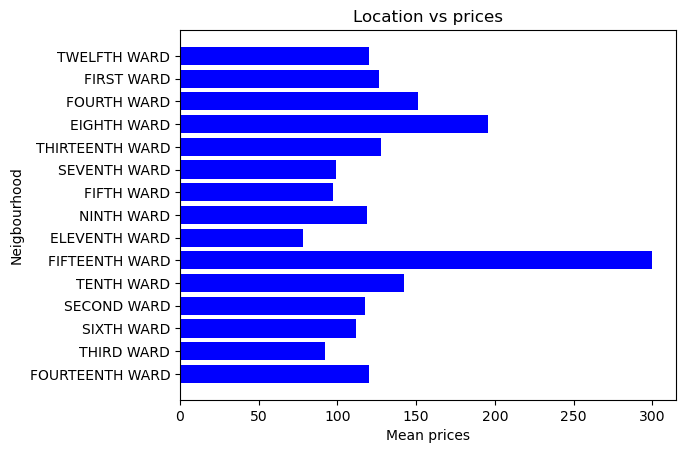

In [12]:
plt.barh(table['neighbourhood'],mean_prices,color='blue')
plt.title('Location vs prices')
plt.ylabel('Neigbourhood')
plt.xlabel('Mean prices')




In [13]:
table.groupby(['room_type'])['price'].mean()


room_type
Entire home/apt    142.087176
Private room        86.090463
Shared room         68.333333
Name: price, dtype: float64

In [14]:
mean_prices_roomtype = table.groupby('room_type')['price'].transform('mean')
mean_prices_roomtype

0       86.090463
1      142.087176
2      142.087176
3      142.087176
4      142.087176
          ...    
402    142.087176
403    142.087176
404     86.090463
405    142.087176
406    142.087176
Name: price, Length: 407, dtype: float64

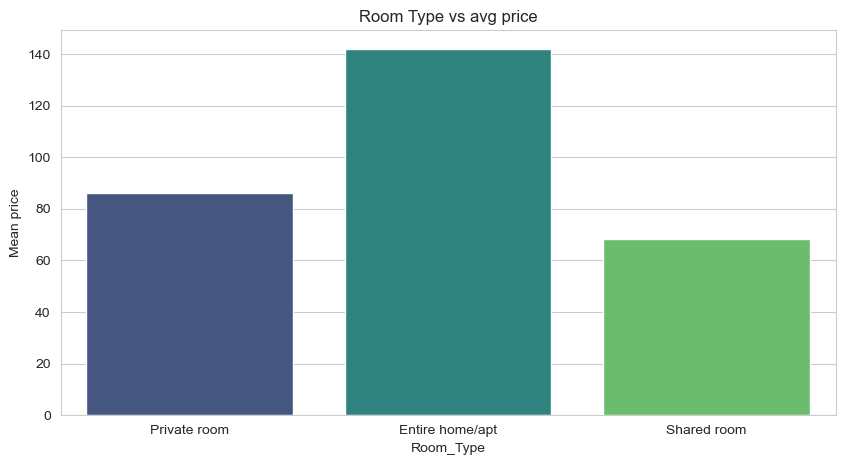

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
sns.barplot(x=table['room_type'], y=mean_prices_roomtype, data=table, palette='viridis')
plt.title('Room Type vs avg price')
plt.xlabel('Room_Type')
plt.ylabel('Mean price')
plt.show()


Text(0.5, 0, 'Mean prices')

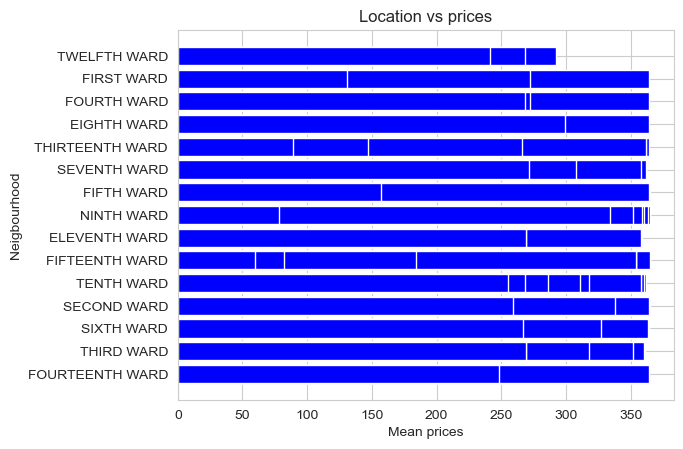

In [16]:
plt.barh(table["neighbourhood"],table['availability_365'],color='blue')
plt.title('Location vs prices')
plt.ylabel('Neigbourhood')
plt.xlabel('Mean prices')



<Axes: xlabel='price', ylabel='Count'>

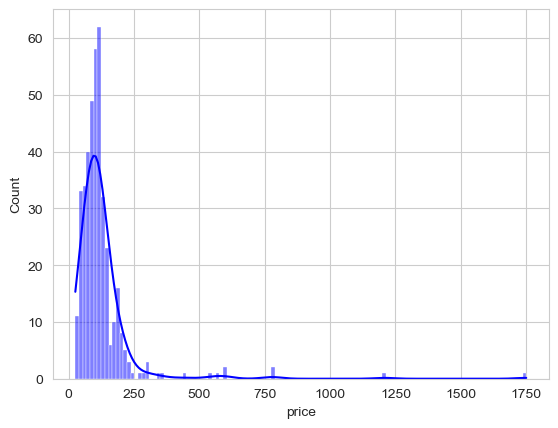

In [21]:
sns.histplot(table['price'], kde=True, color='blue')
#deduction:most of listings are priced at lower end of market, indicates higher concentration of budget friendly options for users
#presence of premium listings/or maybe outliers??

## Findings and Business Plan:

Based on the analysis performed above, we can deduce that:
1. The top 3 most expensive neighborhoods are: **15th, 8th and 4th wards.**
2. Room type of **Entire home/apt** is the most expensive out of the other 2 room types.


Therefore, if someone were to enter the Airbnb market in Albany, New York, the following should be taken into consideration:
1. Obtaining property in one of the top 3 earning neighbourhoods: **15th, 8th and 4th wards.**
2. Having a room type of **Entire home/apt** 

The 2 above criteria should be followed to maximize profit.